# Project 1 


## World Happiness Report - Analytics

#### Meenakshi Shankara
#### DSC680 - Summer 2023

First import all the required packages and set a design pallette for the the visualizations

In [1]:
# Imports and preparing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

import warnings
warnings.filterwarnings("ignore")



# Setting the default style of the plots
sns.set_style('whitegrid')
sns.set_palette('Set2')

# My custom color palette
my_palette = ["#7A92FF", "#FF7AEF", "#B77AFF", "#A9FF7A", "#FFB27A", "#FF7A7A",
             "#7AFEFF", "#D57AFF", "#FFDF7A", "#D3FF7A"]


### Data Prep

Now, import all datasets from year 2015 - 2019 and concatenate them. This involves changes to column names to maintain consistency across all data.

In [2]:

# Importing the 3 datasets
data_2015 = pd.read_csv("C:/Users/meena/Documents/DSC_680/Project1/Milestone2/Data/2015.csv")
data_2016 = pd.read_csv("C:/Users/meena/Documents/DSC_680/Project1/Milestone2/Data/2016.csv")
data_2017 = pd.read_csv("C:/Users/meena/Documents/DSC_680/Project1/Milestone2/Data/2017.csv")

# First we need to prepare the data for merging the tables together (to form only 1 table)
# Tables have different columns, so first we will keep only the columns we need
data_2015 = data_2015[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
data_2016 = data_2016[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']]
data_2017 = data_2017[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family',
                       'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 
                       'Dystopia.Residual']]

# Tables do not have the same column names, so we need to fix that
new_names = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
                       'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                       'Dystopia Residual']

data_2015.columns = new_names
data_2016.columns = new_names
data_2017.columns = new_names

# Add a new column containing the year of the survey
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017

# Merge the data together
data = pd.concat([data_2015, data_2016, data_2017], axis=0)
data.head(3)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204,2015


In [3]:
# New data
data_2018 = pd.read_csv("C:/Users/meena/Documents/DSC_680/Project1/Milestone2/Data/2018.csv")
data_2019 = pd.read_csv("C:/Users/meena/Documents/DSC_680/Project1/Milestone2/Data/2019.csv")

# Concatenate data
data_2018['Year'] = 2018
data_2019['Year'] = 2019

new_data = pd.concat([data_2018, data_2019], axis=0)

# Switching overall rank column with country/ region
columns_titles = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']
new_data = new_data.reindex(columns=columns_titles)

# Renaming old data columns:
old_data = data[['Country', 'Happiness Rank', 'Happiness Score','Economy (GDP per Capita)', 'Family', 
                 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Year']]
old_data.columns = ['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']

# Finally, concatenating all data
data = pd.concat([old_data, new_data], axis=0)

data.head(3)

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015


Creating a heatmap to check if there are any NAs in the data

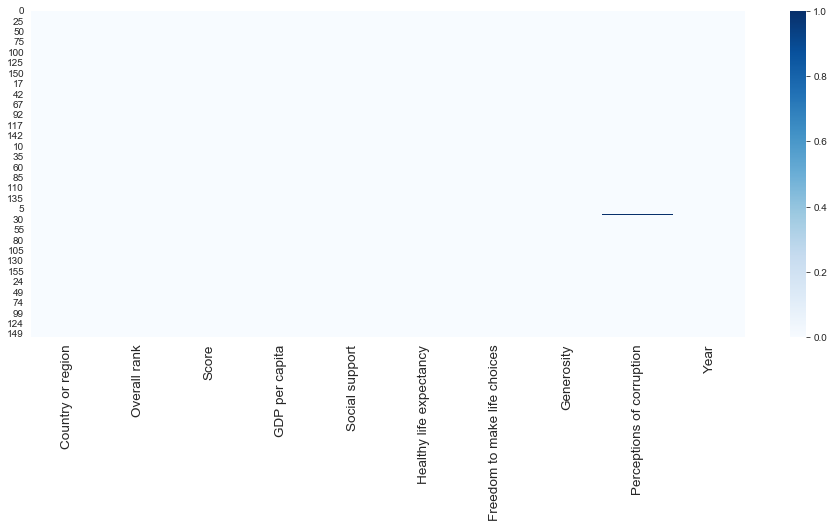

In [4]:
plt.figure(figsize = (16,6))
sns.heatmap(data = data.isna(), cmap = 'Blues')

plt.xticks(fontsize = 13.5);

we can see there's a NaN record in Perception of Corruption. We can remove that record.

In [5]:
data[data['Perceptions of corruption'].isna()]

,Country or region,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
19,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [6]:
data.dropna(axis = 0, inplace = True)

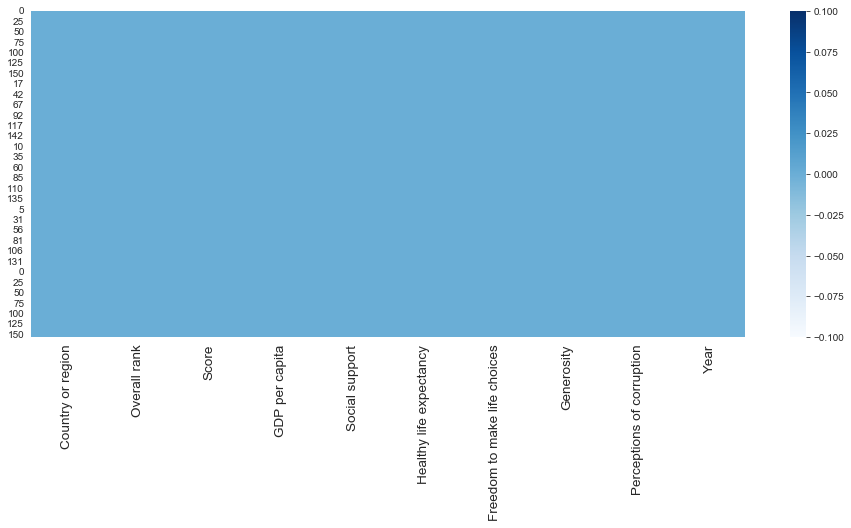

In [7]:
# Double check to see if there are any missing values left
plt.figure(figsize = (16,6))
sns.heatmap(data = data.isna(), cmap = 'Blues')

plt.xticks(fontsize = 13.5);

In [8]:
data.shape

# 10 columns, 781 rows

(781, 10)

In [9]:
data.groupby(by='Year')['Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.5260,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.4040,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.5055,5.2790,6.10150,7.537
2018,155.0,5.366897,1.117433,2.905,4.4515,5.3580,6.15400,7.632
2019,156.0,5.407096,1.113120,2.853,4.5445,5.3795,6.18450,7.769


Grouping the data by year and calculating averages for all the factors. This is to visualize how the factors have fared over the years, on an average.

### Visualizations

In [10]:
# group the data by year and average the factors
grouped = data.groupby(by = 'Year')[['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()

# reconstruct the df by using melt() function
grouped = pd.melt(frame = grouped, id_vars='Year', value_vars=['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], var_name='Factor', value_name='Avg_value')

grouped.head()

,Year,Factor,Avg_value
0,2015,Score,5.375734
1,2016,Score,5.382185
2,2017,Score,5.354019
3,2018,Score,5.366897
4,2019,Score,5.407096


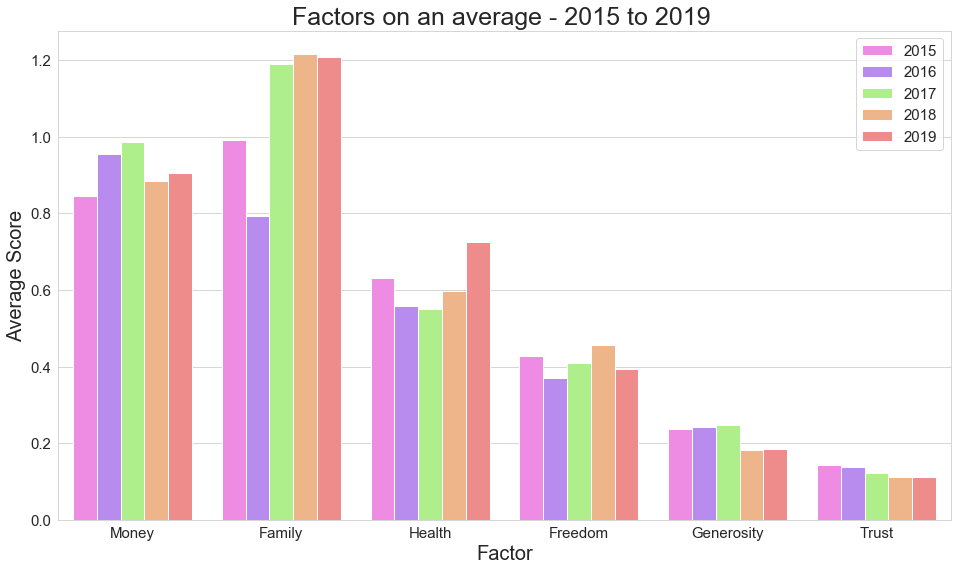

In [11]:
plt.figure(figsize = (16, 9))

ax = sns.barplot(x = grouped[grouped['Factor'] != 'Score']['Factor'], y = grouped['Avg_value'], 
            palette = my_palette[1:], hue = grouped['Year'])

plt.title("Factors on an average - 2015 to 2019 ", fontsize = 25)
plt.xlabel("Factor", fontsize = 20)
plt.ylabel("Average Score", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)

ax.set_xticklabels(['Money','Family', 'Health', 'Freedom', 'Generosity', 'Trust']);

Now we will look at 2019 data, as that is the latest dataset available for this analysis.

In [12]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


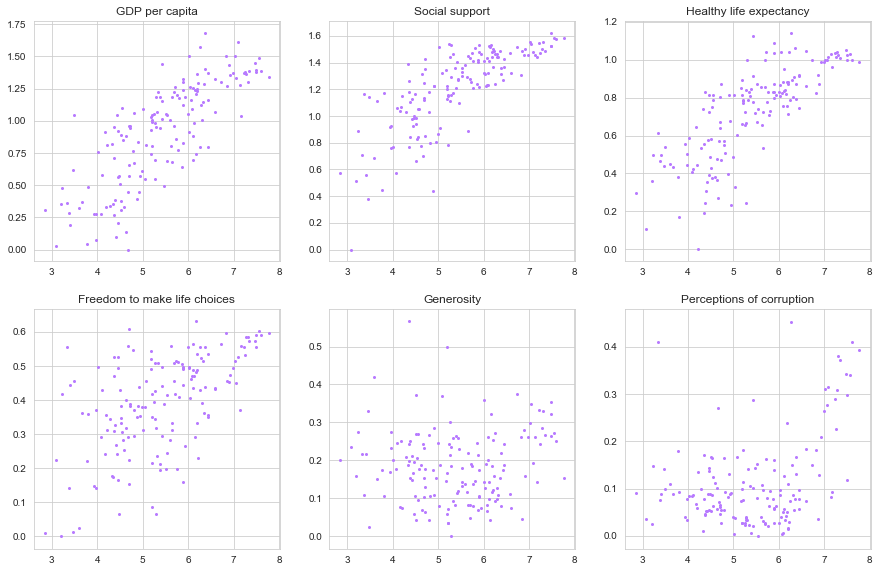

In [13]:

plt.figure(figsize=(15,15))
#plt.subplots_adjust(hspace=1)

for idx,column in enumerate(data_2019.columns[3:9]):
    x = data_2019["Score"]
    y = data_2019[column]
    plt.subplot(3,3,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='#B77AFF',s=4)

Now, we will look at the top 10 Happiest and Least Happy countries in the 2019.

In [14]:
# Average top 10 most happy countries
country_score_avg = data[data['Year']==2019].groupby(by = ['Country or region'])['Score'].mean().reset_index()
table = country_score_avg.sort_values(by = 'Score', ascending = False).head(10)

table

,Country or region,Score
43,Finland,7.769
36,Denmark,7.600
105,Norway,7.554
57,Iceland,7.494
98,Netherlands,7.488
133,Switzerland,7.480
132,Sweden,7.343
99,New Zealand,7.307
23,Canada,7.278
6,Austria,7.246


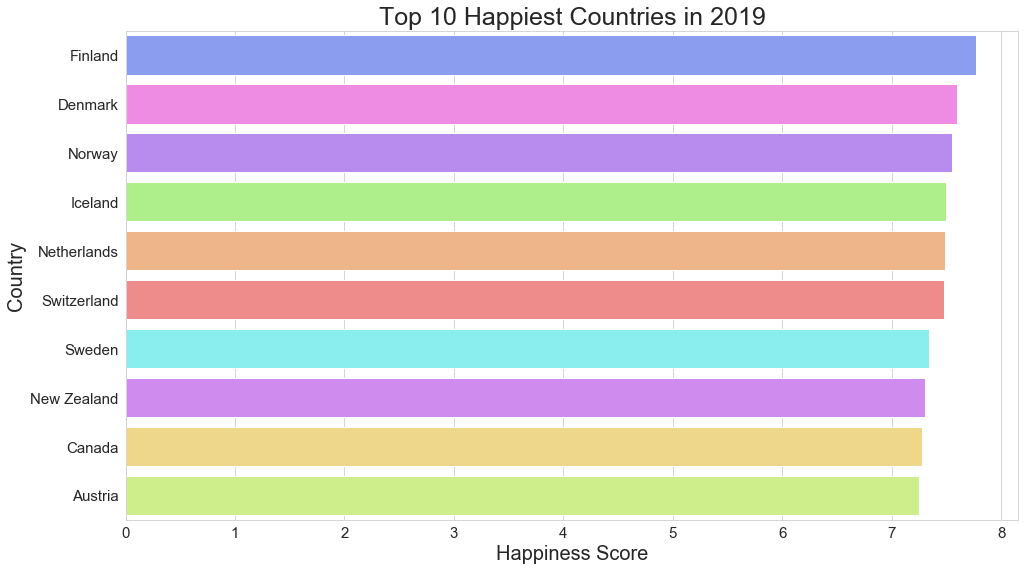

In [15]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table['Country or region'], x = table['Score'], palette = my_palette)

plt.title("Top 10 Happiest Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

In [16]:
# Average top 5 most "not that happy" countries
table2 = country_score_avg.sort_values(by = 'Score', ascending = True).head(10)

table2

,Country or region,Score
128,South Sudan,2.853
24,Central African Republic,3.083
0,Afghanistan,3.203
137,Tanzania,3.231
117,Rwanda,3.334
153,Yemen,3.380
83,Malawi,3.410
134,Syria,3.462
16,Botswana,3.488
53,Haiti,3.597


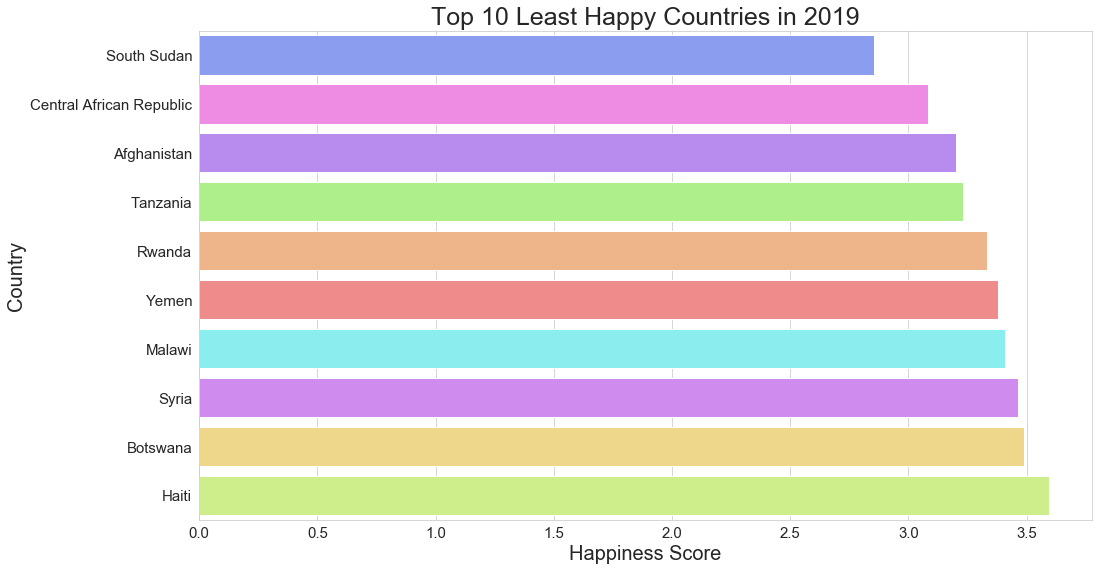

In [17]:
plt.figure(figsize = (16, 9))
sns.barplot(y = table2['Country or region'], x = table2['Score'], palette = my_palette)

plt.title("Top 10 Least Happy Countries in 2019", fontsize = 25)
plt.xlabel("Happiness Score", fontsize = 20)
plt.ylabel("Country", fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

Finland, Denmark, Norway are the top 3 happiest countries while South Sudan, African republic, Afghanistan are the least happiest countries.

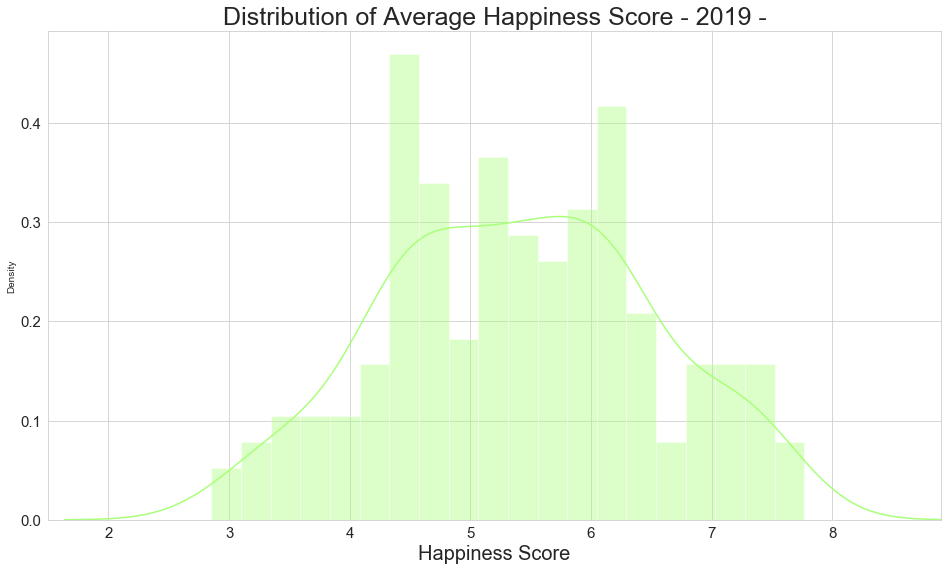

In [18]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (16, 9))

sns.distplot(a = country_score_avg['Score'], bins = 20, kde = True, color = "#A9FF7A")
plt.xlabel('Happiness Score', fontsize = 20)
plt.title('Distribution of Average Happiness Score - 2019 -', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

The concentration of the happiness score is between 4.5 - 6.5 which means most countries are somewhat happy. 

In [19]:
# Calculating the Pearson Correlation

c1 = scipy.stats.pearsonr(data['Score'], data['GDP per capita'])
c2 = scipy.stats.pearsonr(data['Score'], data['Social support'])
c3 = scipy.stats.pearsonr(data['Score'], data['Healthy life expectancy'])
c4 = scipy.stats.pearsonr(data['Score'], data['Freedom to make life choices'])
c5 = scipy.stats.pearsonr(data['Score'], data['Generosity'])
c6 = scipy.stats.pearsonr(data['Score'], data['Perceptions of corruption'])

print('Happiness Score + GDP: pearson = ', round(c1[0],2), '   pvalue = ', round(c1[1],4))
print('Happiness Score + Family: pearson = ', round(c2[0],2), '   pvalue = ', round(c2[1],4))
print('Happiness Score + Health: pearson = ', round(c3[0],2), '   pvalue = ', round(c3[1],4))
print('Happiness Score + Freedom: pearson = ', round(c4[0],2), '   pvalue = ', round(c4[1],4))
print('Happiness Score + Generosity: pearson = ', round(c5[0],2), '   pvalue = ', round(c5[1],4))
print('Happiness Score + Trust: pearson = ', round(c6[0],2), '   pvalue = ', round(c6[1],4))

Happiness Score + GDP: pearson =  0.79    pvalue =  0.0
Happiness Score + Family: pearson =  0.65    pvalue =  0.0
Happiness Score + Health: pearson =  0.74    pvalue =  0.0
Happiness Score + Freedom: pearson =  0.55    pvalue =  0.0
Happiness Score + Generosity: pearson =  0.14    pvalue =  0.0001
Happiness Score + Trust: pearson =  0.4    pvalue =  0.0


The Pearson Correlation provides the relation between the happiness score and the factors impacting it.
GDP and Health have the highest correlation value of ~0.75.

we will create a heatmap to visualize the depth of the impact of factors on the scores/overall rank.

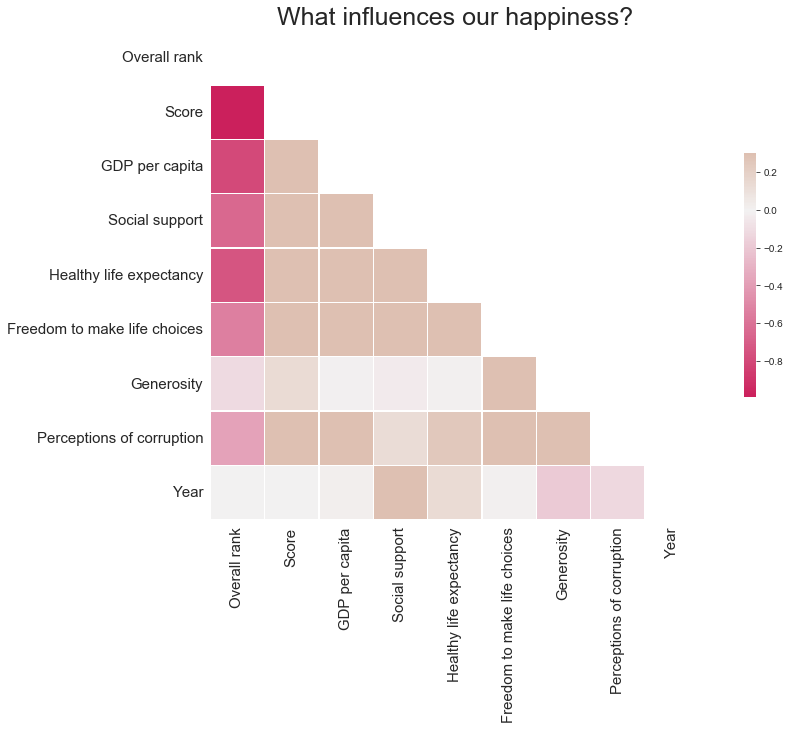

In [20]:
# Computing the Correlation Matrix

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('What influences our happiness?', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

Again, we can see GDP, Health impact the most on the overall rank of a country.

### Modeling

In [21]:
# Importing the libraries
from sklearn.model_selection import train_test_split # for data validation

# Models
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Metrics and Grid Search
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

In [22]:
# Creating the table
data_model = data.groupby(by= 'Country or region')['Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'].mean().reset_index()

# Creating the dependent and independent variables
y = data_model['Score']
X = data_model[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

# Splitting the data to avoid under/overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [23]:
# Creating a predefined function to test the models
def modelfit(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = model.score(X_test,y_test)
    #acc = metrics.accuracy_score(preds, y_test)
    mae = metrics.mean_absolute_error(y_test, preds)
   
    print(model)
    print('Score:', round(score,4))
    #print('Acc Score:', round(acc,4))
    print('MAE:', round(mae,4))

In [24]:
# Linear Regression

lm = LinearRegression(n_jobs = 10000)
modelfit(lm)

LinearRegression(n_jobs=10000)
Score: 0.8298
MAE: 0.3769


In [25]:
# Random Forest Regressor

rf = RandomForestRegressor(n_jobs = 1000)
modelfit(rf)

RandomForestRegressor(n_jobs=1000)
Score: 0.8297
MAE: 0.361


In [26]:
# Decision Tree
dt = DecisionTreeRegressor()
modelfit(dt)

DecisionTreeRegressor()
Score: 0.5848
MAE: 0.5668


In [27]:
# Bayesian Linear Model
br = BayesianRidge(n_iter=1000, tol = 0.5)
modelfit(br)

BayesianRidge(n_iter=1000, tol=0.5)
Score: 0.8324
MAE: 0.3723


From the Model score and Mean Average Error score, we see Bayesian Ridge has performed better than the other models with 83.24%.
Next come Linear Regression and Random Forest modeling methods with 82.98% and 82.54% respectively. Decision tree has not fared well, therefore, it may not be a good fit for this data analysis.